# --------------------------------------- Workshop #4 -------------------------------------


* This workshop includes marked tasks that comprise 15% of your final mark in this module. 

* You need to read the examples in Lecture #4 and Lecture #4 exercise to complete the tasks. 

# Tasks

## TASK 4.1:  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods (10%).

## NOTE: You should comment on your code wherever necessary and briefly explain what the code is doing

In [7]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
#Importing relevant libraries
import pandas as pd
import numpy as np

#Reading csv file into a Pandas DataFrame
data = pd.read_csv('C:/Users/HP/Downloads/adult_WS4.csv')

#Printing data
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [8]:
#selecting 3 columns 'age, fnlwgt and hours-per-week' for clustering and assigning into df_new
df_new = data.iloc[:, [0, 2, 12]]

#Printing new data
print(df_new.head())

   age  fnlwgt  hours-per-week
0   29  216481              40
1   36  280570              45
2   25  100903              25
3   47  145636              48
4   33  119422              40


In [9]:
#checking for null values
df_new.isna().sum()

age               0
fnlwgt            0
hours-per-week    0
dtype: int64

In [10]:
#printing df_new.head
df_new.head(100)

,age,fnlwgt,hours-per-week
0,29,216481,40
1,36,280570,45
2,25,100903,25
3,47,145636,48
4,33,119422,40
...,...,...,...
95,37,65291,40
96,30,430283,40
97,33,368675,40
98,30,140790,45


In [11]:
#Importing StandardScaler for normalisation
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#initializing StandardScaler and fitting in the dataset and normalising
scaler = StandardScaler()
df_normalised=scaler.fit_transform(df_new)

#reading the normalised data into a dataframe
df_norm = pd.DataFrame(df_normalised, columns=df_new.columns)

#printing outcome
df_norm.head(100)

,age,fnlwgt,hours-per-week
0,-0.699693,0.255617,-0.036819
1,-0.189681,0.863654,0.368764
2,-0.991129,-0.840916,-1.253566
3,0.611767,-0.416517,0.612113
4,-0.408258,-0.665219,-0.036819
5,-0.116822,-0.025902,-0.036819
6,-0.335399,1.419349,-0.036819
7,-0.043963,-0.836324,0.206531
8,1.704651,-0.216760,-0.036819
9,0.830344,-1.322164,1.179928


In [12]:
# importing the relevant library for KMeans clustering
from sklearn.cluster import KMeans

# Selecting dataframe for clustering
X_scaled = df_norm

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_norm)


# Initialize the KMeans model
print(kmeans_labels)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 0 1 ... 0 2 1]
[[-0.26018696  1.52865111  0.20124716]
 [-0.73068901 -0.34000767 -0.26080198]
 [ 0.97720048 -0.34370645  0.20644465]]
18165.671914979073


In [13]:
# importing the relevant library for Hierachical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Applying Hierachical clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_norm)

print(labels)
print(hierarchical_cluster.labels_)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 1 1 ... 2 0 1]
[1 1 1 ... 2 0 1]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

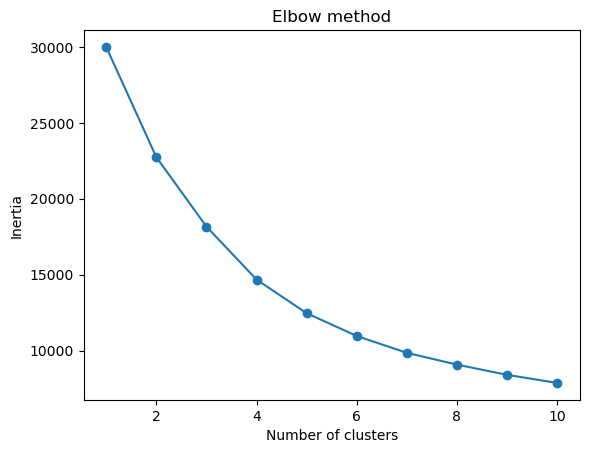

In [14]:
#finding the optimum number of clusters for KMeans clustering using elbow method
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()




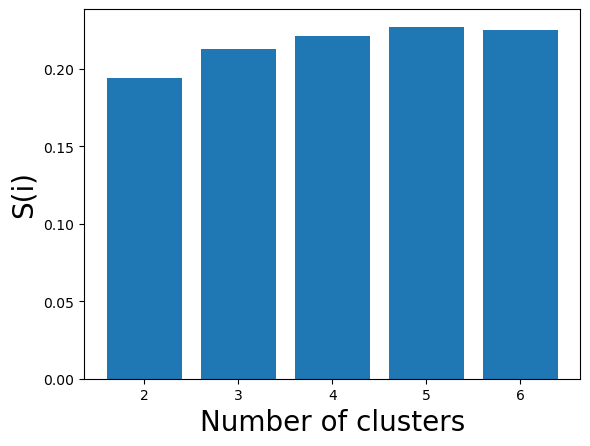

In [15]:
#finding the optimum number of clusters for Hierachical clustering using elbow method
from sklearn.metrics import silhouette_score

inertias = []
k=[]
for i in range(2,7):
    k.append(i)
    ac = AgglomerativeClustering(n_clusters = i)
    labels = ac.fit_predict(df_norm)
    a=silhouette_score(df_norm, labels)
    inertias.append(a)
plt.bar(k, inertias)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

## Task 4.2: Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column (5%). 

## NOTE 1: You should comment on your code wherever necessary and briefly explain what the code is doing.

## NOTE 2: You need to encode the categorical columns, normalise the dataset, and remove the income column before applying the PCA method. 

## HINT: See the examples in the last three slides in Lecture #4 or the Lecture #4 exercise notebook

In [16]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
#importing relevant libraries
import pandas as pd
import numpy as np

#Reading csv file into a DataFrame
df = pd.read_csv('C:/Users/HP/Downloads/adult_WS4.csv')

#printing data
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [17]:
#checking for null values
df.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [18]:
#dropping all null values from workclass, occupation, and native-country columns
df.dropna(inplace=True)

#rechecking for null values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [19]:
#Resetting index after dropping null values
df.reset_index(drop=True, inplace=True)

#printing df to confirm
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9761,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9762,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9763,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [20]:
#Identifying and Replacing wrong values with modes of columns
#creating a list and assigning into a variable
wrong_value_columns = ['workclass', 'occupation', 'native-country']

#Identifying and filling wrong values in the columns
for column in wrong_value_columns:
    #calculating the mode from each column
    mode_value = df[column].mode().iloc[0]
    #filling in the mode values
    df.loc[df[column] == '?', column] = mode_value
    #printing to verify
    print(df[column].unique())

['Private' 'Local-gov' 'Self-emp-inc' 'Federal-gov' 'Self-emp-not-inc'
 'State-gov' 'Without-pay' 'Never-worked']
['Exec-managerial' 'Craft-repair' 'Prof-specialty' 'Handlers-cleaners'
 'Sales' 'Other-service' 'Farming-fishing' 'Transport-moving'
 'Protective-serv' 'Adm-clerical' 'Tech-support' 'Machine-op-inspct'
 'Priv-house-serv' 'Armed-Forces']
['United-States' 'Scotland' 'Columbia' 'Haiti' 'Canada' 'El-Salvador'
 'China' 'Cuba' 'Philippines' 'Germany' 'Hong' 'Mexico' 'Puerto-Rico'
 'Dominican-Republic' 'South' 'India' 'Jamaica' 'Vietnam' 'England'
 'Cambodia' 'Portugal' 'Japan' 'Iran' 'Italy' 'Greece' 'Taiwan' 'Thailand'
 'Ecuador' 'Poland' 'Outlying-US(Guam-USVI-etc)' 'Hungary' 'Guatemala'
 'France' 'Nicaragua' 'Honduras' 'Laos' 'Ireland' 'Peru' 'Yugoslavia'
 'Trinadad&Tobago']


In [21]:
#Importing label Encoder from sklearn preprocessing 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#defining the columns with categorical variables
categorical_columns = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

#iterating through selected columns for encoding
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

#printing outcome
print(df.head())

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   29          3  216481         12             14               2   
1   36          3  280570         15             10               2   
2   25          3  100903          9             13               2   
3   47          3  145636          8             11               2   
4   33          3  119422         11              9               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           3             5     4    0             0             0   
1           2             0     4    1             0             0   
2           9             5     4    0             0             0   
3           5             0     4    1             0             0   
4           3             0     4    1             0             0   

   hours-per-week  native-country income  
0              40              37   >50K  
1              45              37  <=50K  
2              25      

In [22]:
# importing StandardScaler for normalisation 
from sklearn.preprocessing import StandardScaler

#dropping income and assigning the rest features variables into x
x = df.drop('income', axis=1)
#assigning target variable (income) into y
y = df['income']

#Initializing StandardScaler and normalising
scaler = StandardScaler()
df_normalised=scaler.fit_transform(x)

df_norm = pd.DataFrame(df_normalised, columns=x.columns)

#printing outcome
df_norm.head(100)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.706926,-0.097731,0.255087,0.441073,1.530168,-0.411836,-0.785825,2.213623,0.388880,-1.417478,-0.147697,-0.219318,-0.049220,0.252607
1,-0.191838,-0.097731,0.862773,1.226035,-0.031342,-0.411836,-1.037832,-0.891771,0.388880,0.705478,-0.147697,-0.219318,0.360179,0.252607
2,-1.001262,-0.097731,-0.840813,-0.343888,1.139791,-0.411836,0.726211,2.213623,0.388880,-1.417478,-0.147697,-0.219318,-1.277418,0.252607
3,0.617585,-0.097731,-0.416658,-0.605542,0.359035,-0.411836,-0.281813,-0.891771,0.388880,0.705478,-0.147697,-0.219318,0.605819,0.252607
4,-0.412590,-0.097731,-0.665217,0.179420,-0.421720,-0.411836,-0.785825,-0.891771,0.388880,0.705478,-0.147697,-0.219318,-0.049220,0.252607
5,-0.118254,-0.097731,-0.026269,0.179420,-0.421720,0.916513,1.230223,1.592544,0.388880,0.705478,-0.147697,-0.219318,-0.049220,0.252607
6,-0.339006,-0.097731,1.418148,0.179420,-0.421720,1.580687,-0.281813,1.592544,0.388880,-1.417478,-0.147697,-0.219318,-0.049220,0.252607
7,-0.044670,-0.097731,-0.836223,0.179420,-0.421720,-0.411836,0.222199,2.213623,0.388880,-1.417478,-0.147697,-0.219318,0.196419,0.252607
8,1.721345,-0.097731,-0.217017,0.179420,-0.421720,-1.740184,-0.785825,1.592544,0.388880,-1.417478,-0.147697,-0.219318,-0.049220,0.252607
9,0.838337,-1.894979,-1.321782,1.226035,-0.031342,-0.411836,-1.037832,-0.891771,0.388880,0.705478,0.432415,-0.219318,1.178978,0.252607


In [23]:
#Importing Principal Component Analysis PCA
from sklearn.decomposition import PCA

#Initializing the Principal Component Analysis and fitting df_normalised for Analysis
pca_adult = PCA(n_components=2)
principalComponents_adult = pca_adult.fit_transform(df_normalised)
principal_adult_Df = pd.DataFrame(data = principalComponents_adult
    , columns = ['principal component 1', 'principal component 2'])

#printing tail of outcome
print(principal_adult_Df.tail())

      principal component 1  principal component 2
9760              -1.993718              -1.726529
9761               0.485368              -0.436392
9762               0.569821               0.709782
9763              -1.300056              -0.810775
9764              -2.656808              -1.288189


>50K r 0        >50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
9760    <=50K
9761    <=50K
9762    <=50K
9763     >50K
9764    <=50K
Name: income, Length: 9765, dtype: object
<=50K b 0        >50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
9760    <=50K
9761    <=50K
9762    <=50K
9763     >50K
9764    <=50K
Name: income, Length: 9765, dtype: object


<Figure size 640x480 with 0 Axes>

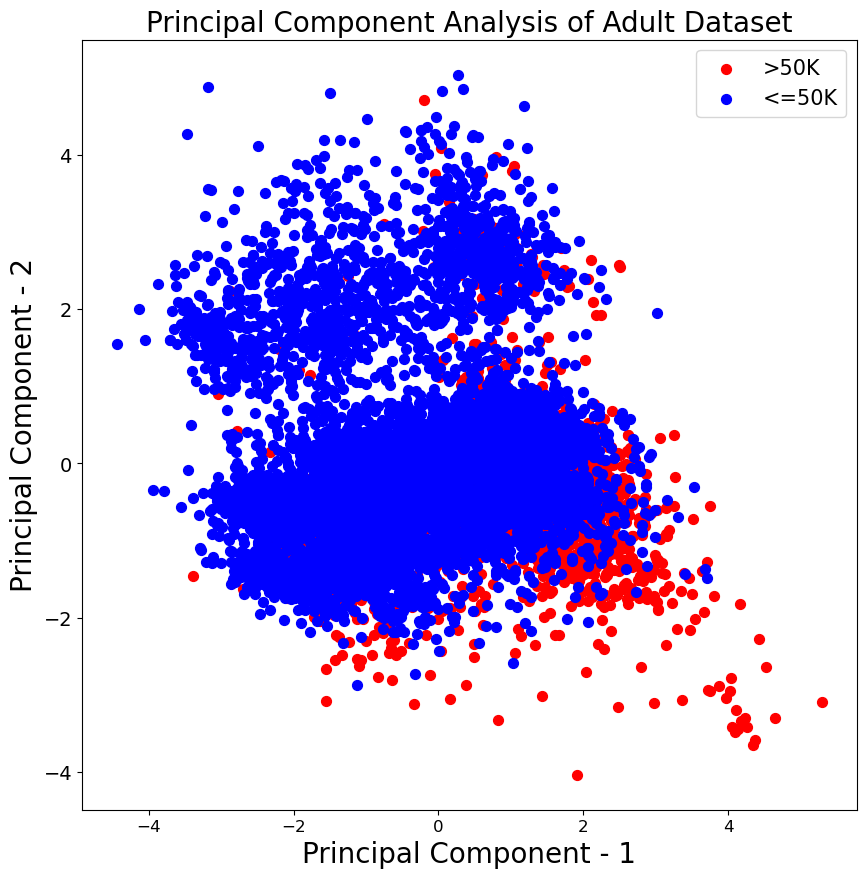

In [24]:
#Plotting the Principal Component Analysis of the Adult dataset
#importing the relevant library
import matplotlib.pyplot as plt

#initializing the plot settings
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Adult Dataset",fontsize=20)
targets = ['>50K', '<=50K']
colors = ['r', 'b']
for target, color in zip(targets ,colors):
    print(target, color, df['income'])
    indicesToKeep = df['income'] == target
    plt.scatter(principal_adult_Df.loc[indicesToKeep, 'principal component 1']
        , principal_adult_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    
plt.legend(targets,prop={'size': 15})


################################ WRITE YOUR REPORT IN THIS CELL (IF APPLICABLE)#################################

4.1 The columns selected for K-Means and Hierarchical clustering are Age, fnlwgt and hours-per-week. They are put in a dataframe and normalised using standard scaler. the optimum number of clusters gotten from the elbow method for Kmeans is 4, while the optimum number of clusters gotten from the Hierarchical method for Agglomerative is 5. (53 WORDS)